## Senado
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para explicar el método electoral <code>no proporcional</code></p>

El sistema electoral vigente en Colombia se encuentra definido en la reforma constitucional del [acto legislativo 01 de 2003](http://www.secretariasenado.gov.co/senado/basedoc/acto_legislativo_01_2003.html) que define metodos de cifra repartidora y umbral para las elecciones de las dos Cámaras del congreso de la republica. 

## Agenda
1. Métodos no lineales
1. Cifra repartidora
1. Método d'Hondt
1. Umbral

In [1]:
import colorama
import pylab as plt

### 1. Métodos no lineales
---
En un sistema electoral existen métodos [no lineales](https://es.wikipedia.org/wiki/Sistema_no_lineal) para repartir los escaños de un cuerpo colegiado, los más conocidos se basan en el promedio mayor y el resto mayor; los métodos de promedio mayor son menos lineales y asignan más escaños a los promedios más altos y los métodos de resto mayor asignan más escaños a los retos más altos.

### 2. Cifra repartidora
---
Los métodos de promedio mayor se basan en la división sucesiva de los votos de cada una de las listas por una sucesión de números para producir una tabla de cocientes llamados promedios, finalmente de todos estos promedios se escogen los mayores de acuerdo a una cifra mínima o cifra repartidora.

### 3. Método d'Hondt 
---
Los métodos de promedio mayor o de cifra repartidora comúnmente utilizados son el método d'Hondt y el Método Sainte-Laguë o Webster, en el primero los divisores son los números naturales (1, 2, 3, ...) y en el segundo solo los números impares (1, 3, 5, ...), de modo que las fórmulas de los cocientes d'Hondt y de Webster en cada iteración se pueden expresar como:

\begin{equation*}
Ch_{i,j} = \frac{V_i}{S_j + 1}
\end{equation*}

\begin{equation*}
Cw_{i,j} = \frac{V_i}{2S_j + 1}
\end{equation*}


><br>**Donde:** 
>* $Ch_j$ es el coeficiente d'Hondt.
>* $Cw_j$ es el coeficiente de Webster.
>* $V_i$ es el número total de votos para la i-ésima lista.
>* $S_j$ es el número j-ésimo de escaños conseguidos por la i-ésima lista.
><br><br>


### 4. Umbral 
---
En cualquiera de los métodos para repartir curules se puede establecer un umbral o limite inferior a partir del cual una lista no acumula credenciales sin importar la cifra repartidora, en el caso de senado este es el 3% de los votos válidos, donde los votos válidos incluyen a la suma de los votos de cada una de las listas y los votos en blanco.

\begin{equation*}
Umbral = \frac{3}{100}V
\end{equation*}

\begin{equation*}
V = \sum{V_i} + V_{blanco}
\end{equation*}

### <code>Ejemplo:</code> método D'Hondt
---
Cálculo de credenciales al senado para cada lista en el escrutinio final de las elecciones legislativas de 2018, realizadas el domingo 11 de marzo en Colombia.

In [2]:
# Funciones
def repartidora(validos_listas: list, max_curules: int) -> int:
    ''' Función que calcula la cifra repartidora '''
    values = []
    tabla = [
        [0 for col in range(max_curules)]
        for row in range(len(validos_listas))
    ]
    count = -1
    for votos in validos_listas:
        count += 1
        for item in range(max_curules):
            value = votos/(item+1)
            values.append(value)
            tabla[count][item] = value
    return round(sorted(values)[-max_curules-2])


def cocientes(validos_listas: list, max_curules: int) -> list:
    ''' Función que calcula las curules para cada lista proporcionalmente '''
    suma = sum(validos_listas)
    proporciones = []
    resto = []
    for votos in validos_listas:
        proporciones.append(votos*max_curules/suma)
        resto.append((votos*max_curules) % suma)
    return proporciones, resto


def distribucion_proporcional(validos_listas: list, max_curules: int) -> list:
    ''' Función que calcula las curules para cada lista proporcionalmente '''
    suma = sum(validos_listas)
    curules = []
    for votos in validos_listas:
        curules.append((votos*max_curules) // suma)
    return curules


def distribucion_promedio(validos_listas: list, cifra_repartidora: int, umbral: int) -> list:
    ''' Función que Calcula las curules para cada lista con el método máximo promedio D'Hondt '''
    curules = []
    for item in validos_listas:
        if item >= umbral:
            curules.append(int(item/cifra_repartidora))
        else:
            curules.append(0)
    return curules


def distribucion_resto(validos_listas: list, max_curules: int) -> list:
    ''' Función que Calcula las curules para cada lista con el método máximo resto '''
    proporciones, resto = cocientes(validos_listas, max_curules)
    proporcionales = distribucion_proporcional(validos_listas, max_curules)
    curules_resto = max_curules - sum(proporcionales)
    minimo = sorted(resto)[-curules_resto]
    curules = []
    count = -1
    for item in resto:
        count += 1
        if item >= minimo:
            curules.append(proporcionales[count]+1)
        else:
            curules.append(proporcionales[count])
    return curules


In [3]:
# Datos votación escrutinio final 2018
nombre_listas = ["CD", "CR", "PC", "PL", "PU", "AV","PD", "DC", "MR", "JL", "OC", "SR", "SC", "CM", "UF", "SP"]
votos_listas = [2_508_534, 2_152_793, 1_930_197, 1_896_283, 1_854_349, 1_312_291,
                725_244, 520_462, 495_106, 464_916, 345_342, 103_368, 58_023, 55_587, 34_555, 13_439]
votos_blancos = 842_286
curules_senado_ordinaria = 100
curules_senado_especial = 8
numero_listas = range(len(votos_listas))

In [4]:
# Cálculo de credenciales senado escrutinio final 2018
suma_listas = sum(votos_listas)
votos_validos = suma_listas + votos_blancos
umbral = votos_validos*(3/100)
cifra_repartidora = repartidora(votos_listas, curules_senado_ordinaria)
proporciones, restos = cocientes(votos_listas, curules_senado_ordinaria)
# Distribución de curules
curules_proporcional = distribucion_proporcional(votos_listas, curules_senado_ordinaria)
curules_promedio = distribucion_promedio(votos_listas, cifra_repartidora, umbral)
curules_resto = distribucion_resto(votos_listas, curules_senado_ordinaria)
# Acumulado de curules
suma_proporcional = sum(curules_proporcional)
suma_promedio = sum(curules_promedio)
suma_resto = sum(curules_resto)

In [5]:
print(f"*"*30)
print(f"Validos      : {votos_validos:15,.0f}")
print(f"Umbral       : {umbral:15,.0f}")
print(f"Repartidora  : {cifra_repartidora:15,.0f}")
print(f"*"*30)
print(f"-"*69)
print(f"|NUM |NOMBRE |{'VOTOS'.ljust(12)} |D.PROP |D.PROM |D.REST |{'RESTO'.center(15)} |")
print(f"-"*69)
for item in numero_listas:
    print(
        f"|{item+1:3.0f} |{nombre_listas[item].center(7)}|{votos_listas[item]:12,.0f}",
        f"|{curules_proporcional[item]:6.0f} |{curules_promedio[item]:6.0f}",
        f"|{curules_resto[item]:6.0f} |{restos[item]:15,.0f} |")
print(f"-"*69)
print(
    f"| TOTALES    |{suma_listas:12,.0f} |{suma_proporcional:6.0f} |{suma_promedio:6.0f} |{suma_resto:6.0f} |")
print(f"-"*52)


******************************
Validos      :      15,312,775
Umbral       :         459,383
Repartidora  :         132,028
******************************
---------------------------------------------------------------------
|NUM |NOMBRE |VOTOS        |D.PROP |D.PROM |D.REST |     RESTO      |
---------------------------------------------------------------------
|  1 |   CD  |   2,508,534 |    17 |    19 |    17 |      4,855,087 |
|  2 |   CR  |   2,152,793 |    14 |    16 |    15 |     12,692,454 |
|  3 |   PC  |   1,930,197 |    13 |    14 |    13 |      4,903,343 |
|  4 |   PL  |   1,896,283 |    13 |    14 |    13 |      1,511,943 |
|  5 |   PU  |   1,854,349 |    12 |    14 |    13 |     11,789,032 |
|  6 |   AV  |   1,312,291 |     9 |     9 |     9 |        994,699 |
|  7 |   PD  |     725,244 |     5 |     5 |     5 |        171,955 |
|  8 |   DC  |     520,462 |     3 |     3 |     4 |      8,634,733 |
|  9 |   MR  |     495,106 |     3 |     3 |     4 |      6,099,133 |
| 10 

In [6]:
# Modelos Lineales - lineas de tendencia
x = plt.linspace(0, proporciones[0], 50)
p0 = plt.polyfit(proporciones, curules_proporcional, 1)
f0 = plt.poly1d(p0)

p1 = plt.polyfit(proporciones, curules_promedio, 1)
f1 = plt.poly1d(p1)

p2 = plt.polyfit(proporciones, curules_resto, 1)
f2 = plt.poly1d(p2)

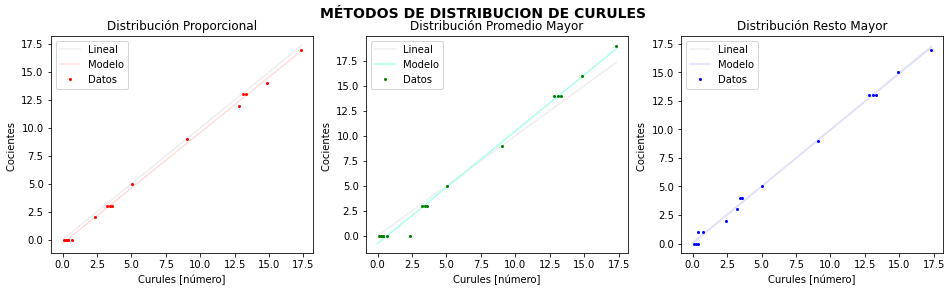

In [7]:
# Gráfica en el plano de el cambio de la variable dependiente con el cambio de la variable independiente
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle(
    'Métodos de distribucion de curules'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].plot(proporciones, proporciones, color="#eee", label="Lineal")
ax[0].plot(x, f0(x), color="#fdd", label="Modelo")
ax[0].plot(
    proporciones, curules_proporcional, 'ro', markersize=2, label="Datos")
ax[0].set_title("Distribución Proporcional")
ax[0].set_xlabel("Curules [número]")
ax[0].set_ylabel("Cocientes ")
ax[0].legend()

# Gráficas 2
ax[1].plot(proporciones, proporciones, color="#eee", label="Lineal")
ax[1].plot(x, f1(x), color="#afe", label="Modelo")
ax[1].plot(
    proporciones, curules_promedio, 'go', markersize=2, label="Datos")
ax[1].set_title("Distribución Promedio Mayor")
ax[1].set_xlabel("Curules [número]")
ax[1].set_ylabel("Cocientes ")
ax[1].legend()

# Gráficas 3
ax[2].plot(proporciones, proporciones, color="#eee", label="Lineal")
ax[2].plot(x, f2(x), color="#ddf", label="Modelo")
ax[2].plot(proporciones, curules_resto, 'bo', markersize=2, label="Datos")
ax[2].set_title("Distribución Resto Mayor")
ax[2].set_xlabel("Curules [número]")
ax[2].set_ylabel("Cocientes ")
ax[2].legend()

plt.show()


---
## Mas Recursos

- [Métodos del promedio mayor](https://es.wikipedia.org/wiki/M%C3%A9todo_de_promedios_mayores) (Wikipedia)
- [Método d'Hondt](https://es.wikipedia.org/wiki/Sistema_D%27Hondt) (Wikipedia)
- [Método Webster](https://es.wikipedia.org/wiki/M%C3%A9todo_Sainte-Lagu%C3%AB) (Wikipedia)
- [Métodos del resto mayor](https://es.wikipedia.org/wiki/M%C3%A9todo_del_resto_mayor) (Wikipedia)